In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
import pandas as pd
import numpy as np
csv_data = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab5/data/[UCI] AAAI-14 Accepted Papers - Papers.csv'
data_df = pd.read_csv(csv_data, sep = ',')
print(len(data_df))

398


In [ ]:
data_df.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [ ]:
data_df = data_df.dropna() 
print(data_df.shape)
nsamples, nfeatures = data_df.shape

(392, 6)


In [ ]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
title = tv.fit_transform(data_df['title'])
print(tv.get_feature_names_out())

['13' 'aaai' 'abduction' ... 'you' 'your' 'zero']


In [ ]:
tv = TfidfVectorizer(ngram_range=(1,6))
groups = tv.fit_transform(data_df['groups'])
print(tv.get_feature_names_out())

['ai' 'ai and' 'ai and the' ...
 'web aiw novel machine learning algorithms' 'web aiw vision'
 'web aiw vision vis']


In [ ]:
tv = TfidfVectorizer(ngram_range=(1,6))
keywords = tv.fit_transform(data_df['keywords'])
print(tv.get_feature_names_out())

['aadd' 'aadd obdd' 'aadd obdd sldd' ... 'zero sum games minimax'
 'zero sum games minimax equilibrium'
 'zero sum games minimax equilibrium oracle']


In [ ]:
tv = TfidfVectorizer(ngram_range=(1,6))
topics = tv.fit_transform(data_df['topics'])
print(tv.get_feature_names_out())

['abductive' 'abductive reasoning' 'abductive reasoning krr' ...
 'with different and often' 'with different and often conflicting'
 'with different and often conflicting interests']


In [ ]:
tv = TfidfVectorizer(ngram_range=(1,2))
abstract = tv.fit_transform(data_df['abstract'])
print(tv.get_feature_names_out())

['000' '000 disambiguated' '000 identities' ... 'ℓ1 regularization' 'ﬁxed'
 'ﬁxed labeling']


In [ ]:
from scipy.sparse import hstack
X = hstack([title, 2*groups, 2*keywords, 2*topics, abstract])

In [ ]:
# build the kmeans model
from sklearn.cluster import KMeans

kmeans  = KMeans(n_clusters = 10, init='k-means++')
cluster_labels = kmeans.fit_predict(X)
kmeans.labels_

array([1, 4, 3, 4, 6, 6, 6, 6, 4, 1, 9, 1, 1, 4, 7, 6, 8, 0, 4, 9, 6, 5,
       8, 1, 1, 6, 0, 9, 4, 6, 3, 9, 1, 1, 3, 5, 6, 8, 4, 3, 1, 5, 6, 7,
       3, 5, 1, 6, 6, 9, 4, 4, 4, 6, 9, 4, 5, 3, 6, 1, 3, 1, 5, 0, 4, 3,
       5, 3, 6, 6, 3, 5, 1, 6, 6, 0, 5, 3, 6, 8, 0, 4, 4, 6, 6, 4, 1, 8,
       6, 6, 1, 0, 7, 6, 6, 9, 9, 0, 6, 0, 5, 4, 6, 4, 7, 2, 8, 7, 6, 5,
       3, 5, 6, 5, 8, 2, 4, 0, 1, 6, 6, 1, 6, 7, 8, 6, 1, 7, 1, 5, 1, 5,
       7, 1, 8, 8, 6, 6, 7, 6, 5, 1, 9, 4, 1, 0, 9, 1, 7, 3, 1, 9, 6, 8,
       1, 2, 4, 7, 6, 6, 6, 3, 5, 1, 2, 0, 8, 4, 5, 8, 5, 8, 2, 5, 5, 7,
       6, 2, 8, 5, 5, 8, 6, 6, 5, 2, 6, 0, 0, 0, 8, 8, 2, 1, 6, 7, 5, 0,
       2, 6, 2, 7, 6, 4, 4, 5, 7, 6, 6, 4, 6, 7, 6, 6, 0, 7, 1, 7, 4, 6,
       6, 6, 6, 8, 1, 6, 0, 6, 6, 7, 6, 1, 3, 4, 9, 8, 7, 6, 6, 6, 4, 1,
       6, 4, 6, 6, 9, 1, 1, 9, 6, 3, 1, 1, 4, 9, 6, 1, 6, 1, 3, 4, 6, 1,
       3, 9, 4, 4, 4, 3, 6, 3, 2, 1, 1, 4, 9, 6, 5, 6, 7, 1, 9, 2, 1, 6,
       5, 1, 4, 4, 5, 9, 1, 5, 8, 6, 4, 1, 1, 1, 6,

In [ ]:
data_df[cluster_labels==0]

,title,authors,groups,keywords,topics,abstract
11,R2: An Efficient MCMC Sampler for Probabilisti...,"Aditya Nori, Chung-Kil Hur, Sriram Rajamani an...",Novel Machine Learning Algorithms (NMLA)\nReas...,Probabilistic programming\nProgram analysis\nS...,MLA: Machine Learning Applications (General/ot...,We present a new Markov Chain Monte Carlo (MCM...
14,Solving Uncertain MDPs by Reusing State Inform...,"Ping Hou, William Yeoh and Tran Cao Son",Planning and Scheduling (PS),Markov Decision Processes (MDPs)\nReplanning\n...,PS: Probabilistic Planning\nPS: Replanning and...,While Markov decision processes (MDPs) are pow...
27,Cached Iterative Weakening for Optimal Multi-W...,Ethan Schreiber and Richard Korf,Heuristic Search and Optimization (HSO)\nPlann...,Heuristic Search\nOptimization\nSearch\nSchedu...,HSO: Heuristic Search\nHSO: Optimization\nHSO:...,The NP-hard number-partitioning problem is to ...
31,Type-based Exploration for Satisficing Planni...,"Fan Xie, Martin Mueller and Robert Holte",Heuristic Search and Optimization (HSO)\nPlann...,Satisficing Planning\nHeuristic Search\nGreedy...,HSO: Heuristic Search\nPS: Deterministic Planning,Utilizing multiple queues in Greedy Best-First...
43,Efficient Object Detection via Adaptive Online...,Matthai Philipose,Novel Machine Learning Algorithms (NMLA)\nPlan...,object detection\nlow power\nvalue of informat...,MLA: Machine Learning Applications (General/ot...,We examine how to use emerging far-infrared im...
45,Recovering from Selection Bias in Causal and S...,"Elias Bareinboim, Jin Tian and Judea Pearl",Knowledge Representation and Reasoning (KRR)\n...,Causal Inference\nCausal Reasoning\nDo-calculu...,"KRR: Action, Change, and Causality\nRU: Bayesi...",Selection bias is caused by preferential exclu...
49,Generalized Label Reduction for Merge-and-Shri...,"Silvan Sievers, Martin Wehrle and Malte Helmert",Heuristic Search and Optimization (HSO)\nPlann...,classical planning\nheuristic search\nmerge-an...,HSO: Heuristic Search\nHSO: Optimization\nHSO:...,Label reduction is a technique for simplifying...
54,Predicting the Hardness of Learning Bayesian N...,"Brandon Malone, Kustaa Kangas, Matti Järvisalo...",Heuristic Search and Optimization (HSO)\nNovel...,Bayesian networks\nstructure learning\nalgorit...,HSO: Metareasoning and Metaheuristics\nHSO: Ev...,There are various algorithms for finding a Bay...
76,The Computational Complexity of Structure-Base...,"Hana Chockler, Gadi Aleksandrowicz, Joseph Y. ...",Knowledge Representation and Reasoning (KRR)\n...,Knowledge Representation and Reasoning\nCausal...,"KRR: Action, Change, and Causality\nKRR: Compu...",Halpern and Pearl 2001 introduced a definition...
92,Symbolic Domain Predictive Control,"Johannes Löhr, Martin Wehrle, Maria Fox and Be...",Planning and Scheduling (PS),planning\ncontrol\nhybrid domains\nswitched li...,PS: Deterministic Planning\nPS: Mixed Discrete...,Planning-based methods to guide switched hybri...


In [ ]:
# dimensionality reduction
from sklearn.manifold import TSNE
features_embedded = TSNE(n_components=2).fit_transform(X)
features_embedded.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(392, 2)

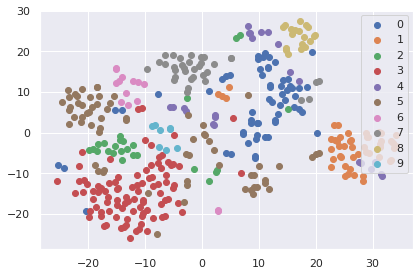

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

for i in range(10):
  plt.scatter(features_embedded[cluster_labels==i][:,0], features_embedded[cluster_labels == i][:,1], label = i)  
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
X1 = hstack([2*title, groups, 2*keywords, topics, 2*abstract])

kmeans  = KMeans(n_clusters = 10, init='k-means++')
cluster_labels = kmeans.fit_predict(X1)
kmeans.labels_

array([6, 1, 0, 4, 1, 4, 1, 1, 4, 1, 2, 7, 6, 4, 9, 1, 5, 1, 4, 4, 8, 3,
       5, 6, 6, 9, 8, 2, 1, 8, 5, 9, 6, 6, 0, 3, 1, 5, 1, 0, 6, 3, 1, 1,
       5, 3, 6, 1, 4, 9, 4, 4, 7, 1, 7, 4, 9, 0, 4, 6, 0, 6, 7, 1, 4, 5,
       3, 5, 8, 3, 5, 3, 6, 1, 8, 1, 3, 0, 8, 5, 8, 4, 1, 1, 1, 7, 6, 8,
       1, 1, 6, 9, 9, 0, 1, 2, 4, 0, 1, 0, 3, 4, 1, 8, 7, 2, 5, 9, 1, 3,
       0, 3, 4, 3, 5, 2, 7, 8, 6, 4, 8, 6, 1, 7, 0, 4, 7, 9, 6, 9, 6, 3,
       7, 7, 5, 5, 8, 1, 9, 4, 3, 6, 7, 7, 6, 1, 2, 6, 9, 0, 6, 4, 9, 0,
       6, 2, 4, 9, 6, 4, 1, 5, 3, 6, 2, 1, 0, 4, 9, 7, 3, 5, 9, 3, 3, 1,
       1, 2, 0, 7, 3, 5, 1, 4, 3, 2, 1, 7, 4, 5, 5, 5, 2, 6, 1, 7, 9, 5,
       2, 1, 2, 9, 4, 4, 4, 3, 9, 8, 1, 4, 1, 7, 7, 1, 4, 9, 6, 9, 4, 8,
       1, 1, 1, 5, 7, 4, 4, 1, 1, 7, 8, 6, 0, 4, 6, 5, 9, 3, 8, 7, 4, 6,
       1, 4, 0, 1, 2, 6, 6, 2, 1, 0, 6, 6, 4, 9, 4, 6, 1, 6, 0, 7, 4, 6,
       0, 2, 6, 4, 4, 5, 1, 5, 1, 7, 6, 4, 2, 1, 3, 1, 9, 6, 2, 2, 1, 0,
       3, 6, 4, 4, 3, 2, 6, 3, 5, 9, 4, 6, 6, 7, 1,

In [ ]:
data_df[cluster_labels==9]

,title,authors,groups,keywords,topics,abstract
14,Solving Uncertain MDPs by Reusing State Inform...,"Ping Hou, William Yeoh and Tran Cao Son",Planning and Scheduling (PS),Markov Decision Processes (MDPs)\nReplanning\n...,PS: Probabilistic Planning\nPS: Replanning and...,While Markov decision processes (MDPs) are pow...
25,Towards Understanding Unscripted Gesture and L...,"Cynthia Matuszek, Liefeng Bo, Luke Zettlemoyer...",Humans and AI (HAI)\nNLP and Machine Learning ...,Human-Robot Interaction\nRobotics\nNatural Lan...,APP: Other Applications\nHAI: Language Acquisi...,"As robots become more ubiquitous, it is increa..."
31,Type-based Exploration for Satisficing Planni...,"Fan Xie, Martin Mueller and Robert Holte",Heuristic Search and Optimization (HSO)\nPlann...,Satisficing Planning\nHeuristic Search\nGreedy...,HSO: Heuristic Search\nPS: Deterministic Planning,Utilizing multiple queues in Greedy Best-First...
49,Generalized Label Reduction for Merge-and-Shri...,"Silvan Sievers, Martin Wehrle and Malte Helmert",Heuristic Search and Optimization (HSO)\nPlann...,classical planning\nheuristic search\nmerge-an...,HSO: Heuristic Search\nHSO: Optimization\nHSO:...,Label reduction is a technique for simplifying...
56,A Parameterized Complexity Analysis of General...,"Martin Kronegger, Martin Lackner, Andreas Pfan...",Game Playing and Interactive Entertainment (GP...,Computational social choice\nCP-nets\nFixed-pa...,GTEP: Social Choice / Voting\nKRR: Computation...,Generalized CP-nets (GCP-nets) allow a succinc...
91,Modeling and mining spatiotemporal patterns of...,"Bo Yang, Hua Guo and Yi Yang",Computational Sustainability and AI (CSAI)\nNo...,active surveillance planning\nspatiotemporal d...,CSAI: Modeling and prediction of dynamic and s...,Active surveillance is a desirable way to prev...
92,Symbolic Domain Predictive Control,"Johannes Löhr, Martin Wehrle, Maria Fox and Be...",Planning and Scheduling (PS),planning\ncontrol\nhybrid domains\nswitched li...,PS: Deterministic Planning\nPS: Mixed Discrete...,Planning-based methods to guide switched hybri...
107,Structured Possibilistic Planning using Decisi...,"Nicolas Drougard, Florent Teichteil-Königsbuch...",Knowledge Representation and Reasoning (KRR)\n...,Qualitative Planning under Uncertainty\nSymbol...,KRR: Qualitative Reasoning\nKRR: Reasoning wit...,Qualitative Possibilistic Mixed-Observable MDP...
127,A Framework for Task Planning in Heterogeneous...,Jennifer Buehler and Maurice Pagnucco,Planning and Scheduling (PS)\nRobotics (ROB),Robot Task Planning\nTemporal Planning\nHetero...,PS: Temporal Planning\nPS: Planning (General/O...,"In heterogeneous multi-robot teams, robustness..."
129,Using Model-Based Diagnosis to Improve Softwar...,"Tom Zamir, Roni Stern and Meir Kalech",Applications (APP)\nKnowledge Representation a...,Model based diagnosis\nSoftware engineering\nP...,APP: Other Applications\nKRR: Automated Reason...,We propose a combination of AI techniques to i...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


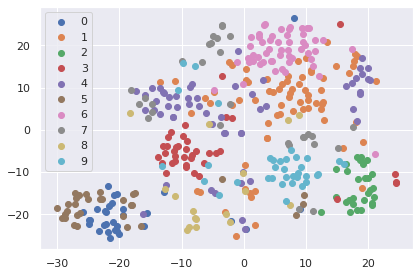

In [ ]:
features_embedded = TSNE(n_components=2).fit_transform(X1)
features_embedded.shape

sns.set()

for i in range(10):
  plt.scatter(features_embedded[cluster_labels==i][:,0], features_embedded[cluster_labels == i][:,1], label = i)  
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# try using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggloc = AgglomerativeClustering(distance_threshold=None, n_clusters = 10, affinity="cosine", linkage="complete", compute_distances=True)
cluster_labels = aggloc.fit_predict(X.toarray())

In [ ]:
data_df[cluster_labels==1]

,title,authors,groups,keywords,topics,abstract
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
8,Fraudulent Support Telephone Number Identifica...,"Xin Li, Yiqun Liu, Min Zhang and Shaoping Ma",AI and the Web (AIW),Fraudulent Support Telephone Number\nCo-occurr...,AIW: Enhancing web search and information retr...,"""Fraudulent support phones"" refers to the misl..."
13,Influence Maximization with Novelty Decay in S...,"Shanshan Feng, Xuefeng Chen, Gao Cong, Yifeng ...",AI and the Web (AIW),social networks\ninfluence maximization\nnovel...,AIW: Social networking and community identific...,Influence maximization problem is to find a se...
18,Cross-View Feature Learning for Scalable Socia...,"Wenxuan Xie, Yuxin Peng and Jianguo Xiao",AI and the Web (AIW),Cross-View Learning\nFeature Learning\nRandom ...,AIW: AI for multimedia and multimodal web appl...,Nowadays images on social networking websites ...
25,Towards Understanding Unscripted Gesture and L...,"Cynthia Matuszek, Liefeng Bo, Luke Zettlemoyer...",Humans and AI (HAI)\nNLP and Machine Learning ...,Human-Robot Interaction\nRobotics\nNatural Lan...,APP: Other Applications\nHAI: Language Acquisi...,"As robots become more ubiquitous, it is increa..."
28,Online Social Spammer Detection,"Xia Hu, Jiliang Tang and Huan Liu",AI and the Web (AIW)\nMachine Learning Applica...,Social Media\nSocial Spammer\nOnline Learning,AIW: Machine learning and the web\nAIW: Recogn...,The explosive use of social media also makes i...
38,Quality-based Learning for Web Data Classifica...,Ou Wu,AI and the Web (AIW)\nMachine Learning Applica...,Information quality\nMulti-task learning\nWeb ...,AIW: Machine learning and the web\nMLA: Applic...,The types of web data vary in terms of informa...
50,Predicting Emotions in User-Generated Videos,Yu-Gang Jiang and Baohan Xu,AI and the Web (AIW),Emotion\nUser-generated videos\nMultimodal fea...,AIW: AI for multimedia and multimodal web appl...,User-generated video collections are expanding...
51,Emotion Classification in Microblog Texts Usin...,Shiyang Wen and Xiaojun Wan,AI and the Web (AIW),Emotion Classification\nChinese Microblogs\nCl...,AIW: Knowledge acquisition from the web\nAIW: ...,This paper studies the problem of emotion clas...
55,"Stochastic Privacy: Model, Methods, and Experi...","Adish Singla, Ece Kamar, Ryen White and Eric H...",AI and the Web (AIW),privacy tradeoff\nvalue of information\nonline...,"AIW: Representing, reasoning, and using proven...",Online services such as web search and e-comme...


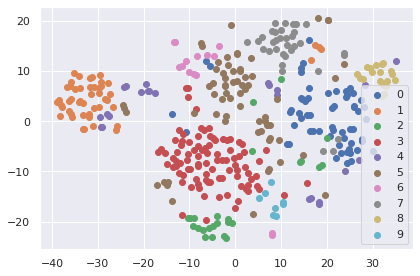

In [ ]:
sns.set()

for i in range(10):
  plt.scatter(features_embedded[cluster_labels==i][:,0], features_embedded[cluster_labels == i][:,1], label = i)  
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# determine the optimal number of clusters for k Means
# The Elbow Method

# calculate the Within-Cluster-Sum of Squared Erorrs for different values of k
# choose the k for which WSS becomes first starts to diminish
def calculate_WSS(points, kmax):
  points = points.toarray()
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

Text(0.5, 1.0, 'Within-Cluster-Sum of Squared Erorrs for different values of k')

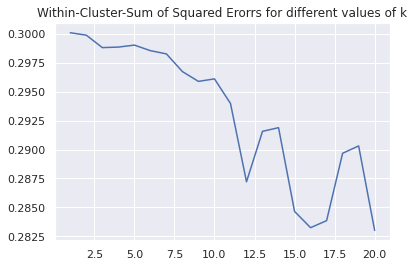

In [ ]:
# elbow plot
import matplotlib.pyplot as plt

wss = calculate_WSS(X, 20)
k = [i for i in range(1, 21)]
plt.plot(k, wss)
plt.title("Within-Cluster-Sum of Squared Erorrs for different values of k")

In [ ]:
# Silhouette Method
# the silhouette values measures how similar a point is to its own cluster(cohesion) compared to other cllusters(separation)
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

Text(0.5, 1.0, 'Silhouette values against different k')

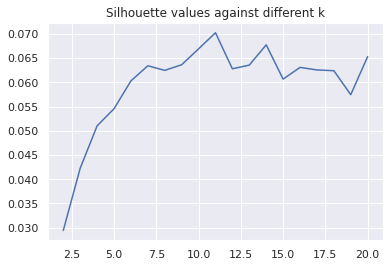

In [ ]:
k = [i for i in range(2, kmax+1)]
plt.plot(k, sil)
plt.title("Silhouette values against different k")

In [ ]:
# TODO: implementation of k-means++
class KMeans_pp(object):
  def __init__(self, n_clusters=5):
    self.centroids_ = None
    self.labels_ = None
    self.n_clusters_ = n_clusters

  def fit_predict(self, X):
    centroids = self._get_centroid(X)
    # X1 = X.toarray()
    X1 = X
    isDiff = True
    while isDiff:
      labels = [0]*(X1.shape[0])
      for i in range(X1.shape[0]):
        point = X1[i,:]
        dist = []
        for j in range(len(centroids)):
          dist.append(self._distance(point, centroids[j]))
        dist = np.array(dist)
        labels[i] = np.argmin(np.array(dist))

      no_change = True
      for c_id in range(len(centroids)):
        labels = np.array(labels)
        points_in_c = X1[np.where(labels == c_id),:]
        new_c = np.mean(points_in_c, axis=1)
        if not (new_c == centroids[j]).all():
          no_change = False
          centroids[j] = new_c
      if no_change: isDiff = False

    self.centroids_ = centroids
    self.labels_ = labels 
    return self.labels_

  
  # compute the euclidean distance
  def _distance(self, p1, p2):
    return np.sum((p1-p2)**2)

  def _get_centroid(self, X):
    # X1 = X.toarray()
    X1 = X
    nsamples, nfeatures = X1.shape
    # stores the index of data point in the sample
    centroids = []
    centroids.append(X1[np.random.choice(X1.shape[0], 1, replace=False), :])

    for c_id in range(self.n_clusters_-1):
      dist = []
      for i in range(X1.shape[0]):
        point = X1[i,:]
        d = np.inf
        # calculate the distance of every centriod with every other data point
        for j in range(len(centroids)):
          temp_dist = self._distance(point, centroids[j])
          d = min(d, temp_dist)
        dist.append(d)
      
      dist = np.array(dist)
      next_centroid = X1[np.argmax(dist), :]
      centroids.append(next_centroid)
    
    return centroids

